# Exercises on attention

In [31]:
import numpy as np
import torch

### Dot product
1) Calculate the dot product between two word embedding which you believe are similar
2) Calculate the dot product between the two word and a word which you believe is dissimilar

In [2]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")

In [11]:
np.dot(model['man'], model['woman'])

25.906174

In [10]:
np.dot(model['house'], model['jump'])

5.3584146

In [13]:
np.dot(model['man'], model['man'])

27.504671

In [18]:
np.dot(model['man'], model['house'])

15.239387

In [19]:
np.dot(model['woman'], model['house'])

15.118877

3) make the three words into a matrix $E$ and multiply it with its own transpose using matrix multiplication. So $E \cdot E^T$

In [22]:
E = np.array([model['man'], model['woman'], model['house']])
np.matmul(E, E.T)
# This is equal to the dot product between the word embeddings 
# - e.g. first col = dot(man, man), dot(man, woman), dot(man, house)

array([[27.504673, 25.906172, 15.239388],
       [25.906172, 31.081322, 15.118874],
       [15.239388, 15.118874, 26.629263]], dtype=float32)

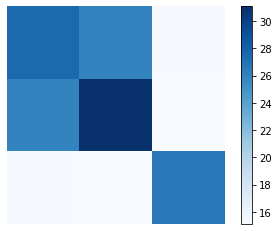

In [54]:
import matplotlib.pyplot as plt
QK =np.matmul(E, E.T)
plt.imshow(QK, cmap='Blues')
plt.colorbar()
plt.axis('off')
plt.show()

4) Examine the attention formula from Vaswani et al. (2017), you have now implemented $Q\cdot K^T$

$$
Attention(Q, K, V) = softmax(\frac{Q\cdot K^T}{\sqrt{d}}) \cdot V
$$
Where $d$ is the dimension of of the embedding and Q, K, V stands for queries, keys and values.


  - 4.1) Now add the softmax. Examining the outcome, how come that the matrix is no longer symmetric?
  - 4.2) Now normalize the using the $\sqrt{d}$, how does this change the outcome?

In [25]:
E = np.array([model['man'], model['woman'], model['house']])
QK = np.matmul(E, E.T)

In [57]:
QK_tensor = torch.tensor(QK)
soft = torch.nn.Softmax(dim=0)
soft(QK_tensor)

tensor([[8.3181e-01, 5.6236e-03, 1.1309e-05],
        [1.6819e-01, 9.9438e-01, 1.0025e-05],
        [3.9199e-06, 1.1618e-07, 9.9998e-01]])

In [32]:
d = 50
QK/np.sqrt(d)

array([[3.889748 , 3.663686 , 2.155175 ],
       [3.663686 , 4.3955626, 2.1381316],
       [2.155175 , 2.1381316, 3.7659464]], dtype=float32)

In [58]:
attention = soft(torch.tensor(QK/np.sqrt(d)))

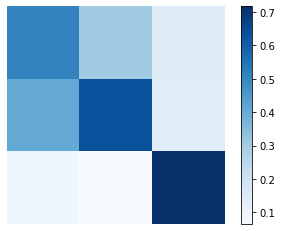

In [61]:
import matplotlib.pyplot as plt
plt.imshow(attention, cmap='Blues')
plt.colorbar()
plt.axis('off')
plt.show()

The matrix resulting from the softmax is referred to as the attention matrix and is how much each matrix should pay attention to the others when we multiply our attention matrix by our matrix $E$ (corresponding to $V$). Try it out:

- 5.1) This is essentially a weighted sum, one way to see this is to extract the weight from the first row of the matrix

In [78]:
attn = attention[0] # first row
weighted = attn[0] * E[0] + attn[1] * E[1] + attn[2] * E[2]
weighted

tensor([-0.0168,  0.4553, -0.2684, -0.4422,  1.4078,  0.6498, -0.4594,  0.3144,
        -0.0282, -0.1918, -0.2583, -0.1760, -0.2305,  0.4504,  0.5662, -0.2919,
        -0.2262,  0.4274, -0.3106,  0.0906, -0.4081,  1.2343, -0.0629,  0.3290,
         0.3516, -2.4893, -0.6507,  0.3532,  0.1980, -0.2516,  2.4110, -0.4003,
        -0.2784,  0.0607,  0.2499,  0.1769,  0.0999, -0.0049,  0.2741, -0.6425,
        -0.1757,  0.4778,  0.0475,  0.1765,  0.5002, -0.4469, -0.4376, -1.0416,
         0.4228, -0.0625])

6) now I want to create a function called attention to compute the scaled dot product attention presented above. It should return both the output, but also the attention matrix. Use to compute the scaled dot product attention of the embeddings `["man", "woman", "apple", "banana", "pineapple"]` (you shouldn't use any learned weights).

- 6.1) Examine the attention matrix, which words have a higher attention weight and why?

In [ ]:
def attention(Q,K,v):
    d = v.shape[0]
    QK = np.matmul(Q,K)/np.sqrt(d)

    soft = torch.nn.Softmax(dim=0)
    attn_mat = soft(torch.Tensor(QK))
    return attn_mat